In [155]:
import pandas
import seaborn
import requests
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [153]:
df = pandas.read_csv(r'C:\Users\agruberova\Dropbox\Python\_Study\Kaggle\house-prices-advanced-regression-techniques\train.csv')

df = df[['SalePrice',
'LotFrontage', 
'Neighborhood', 
'LotArea', 
'GrLivArea',
'OverallQual', 
#'OverallCond',
'YearBuilt', 'YearRemodAdd',
'GarageCars', 
'GarageArea',
'FullBath', 
#'PoolQC'
]]

df = df.rename(columns={#'PoolQC':'bazen',
'LotFrontage':'plocha_pozemku_pred_domem_m2' ,
'Neighborhood':'sousedstvi',
'LotArea':'plocha_pozemku_m2' ,
'OverallQual':'celkova_kvalita' ,
#'OverallCond':'celkova_udrzovanost',
'YearBuilt':'rok_vystavby' ,
'YearRemodAdd' :'rok_rekonstrukce' ,                  
'SalePrice':'prodejni_cena_mil' ,
'GrLivArea':'obytna_plocha_m2',
'GarageCars':'pocet_aut_v_garazi',
'FullBath':'pocet_koupelen',
'GarageArea':'plocha_garaze_m2'
})

# prevod na metry
col_plocha = ['plocha_pozemku_pred_domem_m2','obytna_plocha_m2','plocha_pozemku_m2','plocha_garaze_m2']
df[col_plocha] = df[col_plocha]  / 10.764
df['prodejni_cena_mil'] = df['prodejni_cena_mil'] * 20 /1000000
df.head()

,prodejni_cena_mil,plocha_pozemku_pred_domem_m2,sousedstvi,plocha_pozemku_m2,obytna_plocha_m2,celkova_kvalita,rok_vystavby,rok_rekonstrukce,pocet_aut_v_garazi,plocha_garaze_m2,pocet_koupelen
0,4.17,6.038647,CollgCr,785.024155,158.862876,7,2003,2003,2,50.910442,2
1,3.63,7.432181,Veenker,891.861761,117.242661,6,1976,1976,2,42.735043,2
2,4.47,6.317354,CollgCr,1045.150502,165.923449,7,2001,2002,2,56.484578,2
3,2.80,5.574136,Crawfor,887.216648,159.513192,7,1915,1970,3,59.643255,1
4,5.00,7.803790,NoRidge,1324.786325,204.199182,8,2000,2000,3,77.666295,2


### Import dat

In [165]:
r = requests.get("https://raw.githubusercontent.com/Anna222/python-032021/master/ceny_domu.csv")
open("byty.csv", "wb").write(r.content)
df = pandas.read_csv("byty.csv", index_col=0)
df.head()

,prodejni_cena_mil,plocha_pozemku_pred_domem_m2,sousedstvi,plocha_pozemku_m2,obytna_plocha_m2,celkova_kvalita,rok_vystavby,rok_rekonstrukce,pocet_aut_v_garazi,plocha_garaze_m2,pocet_koupelen
0,4.17,6.038647,CollgCr,785.024155,158.862876,7,2003,2003,2,50.910442,2
1,3.63,7.432181,Veenker,891.861761,117.242661,6,1976,1976,2,42.735043,2
2,4.47,6.317354,CollgCr,1045.150502,165.923449,7,2001,2002,2,56.484578,2
3,2.80,5.574136,Crawfor,887.216648,159.513192,7,1915,1970,3,59.643255,1
4,5.00,7.803790,NoRidge,1324.786325,204.199182,8,2000,2000,3,77.666295,2


### Hledame outliery

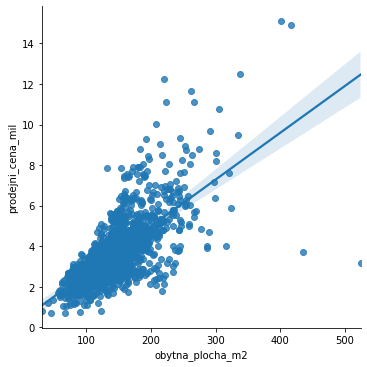

In [91]:
seaborn.lmplot(x='obytna_plocha_m2', y='prodejni_cena_mil',data=df)

### Hledame nulls

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   prodejni_cena_mil             1460 non-null   float64
 1   plocha_pozemku_pred_domem_m2  1201 non-null   float64
 2   sousedstvi                    1460 non-null   object 
 3   plocha_pozemku_m2             1460 non-null   float64
 4   obytna_plocha_m2              1460 non-null   float64
 5   celkova_kvalita               1460 non-null   int64  
 6   rok_vystavby                  1460 non-null   int64  
 7   rok_rekonstrukce              1460 non-null   int64  
 8   pocet_aut_v_garazi            1460 non-null   int64  
 9   plocha_garaze_m2              1460 non-null   float64
 10  pocet_koupelen                1460 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 125.6+ KB


In [93]:
df['plocha_pozemku_pred_domem_m2'] = df['plocha_pozemku_pred_domem_m2'].fillna(0)

### Koukame se na korelace mezi sloupci

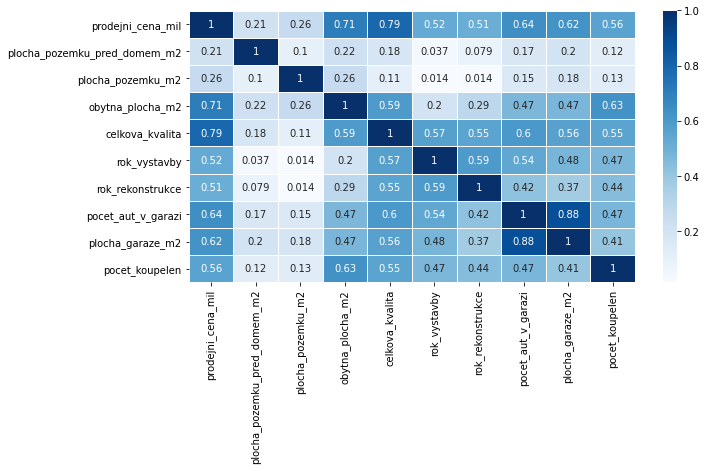

In [94]:
f, ax = plt.subplots(figsize=(10, 5))
seaborn.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap="Blues", vmax=1)
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t)
plt.show()

In [95]:
# smazeme sloupec co by zbytecne duplikoval informace
df = df.drop('pocet_aut_v_garazi', axis=1)

In [96]:
df.head()

,prodejni_cena_mil,plocha_pozemku_pred_domem_m2,sousedstvi,plocha_pozemku_m2,obytna_plocha_m2,celkova_kvalita,rok_vystavby,rok_rekonstrukce,plocha_garaze_m2,pocet_koupelen
0,4.17,6.038647,CollgCr,785.024155,158.862876,7,2003,2003,50.910442,2
1,3.63,7.432181,Veenker,891.861761,117.242661,6,1976,1976,42.735043,2
2,4.47,6.317354,CollgCr,1045.150502,165.923449,7,2001,2002,56.484578,2
3,2.80,5.574136,Crawfor,887.216648,159.513192,7,1915,1970,59.643255,1
4,5.00,7.803790,NoRidge,1324.786325,204.199182,8,2000,2000,77.666295,2


### Regresni model

In [127]:
# Fit regression model
mod = smf.ols(formula='prodejni_cena_mil ~ obytna_plocha_m2', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      prodejni_cena_mil   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):          4.52e-223
Time:                        21:01:41   Log-Likelihood:                -2238.0
No. Observations:                1460   AIC:                             4480.
Df Residuals:                    1458   BIC:                             4491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3714      0.090      4.144      0.000       0.196       0.547
obytna_plocha_m2     0.0231      0.001     38.348      0.000       0.022       0.024
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### pouzit model k predikci

In [139]:
data = pandas.DataFrame({'obytna_plocha_m2':[200,300,500]})
data['predikce'] = res.predict(data)
data

,obytna_plocha_m2,predikce
0,200,4.983985
1,300,7.290288
2,500,11.902892


### Porovnat, ktery model funguje lepe

In [98]:
mod = smf.ols(formula='prodejni_cena_mil ~ obytna_plocha_m2 + plocha_pozemku_pred_domem_m2 + plocha_pozemku_m2 + celkova_kvalita + rok_vystavby + rok_rekonstrukce + plocha_garaze_m2 + pocet_koupelen', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      prodejni_cena_mil   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     593.3
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:22:55   Log-Likelihood:                -1687.3
No. Observations:                1460   AIC:                             3393.
Df Residuals:                    1451   BIC:                             3440.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -26.9010      2.583    -10.416      0.000     -31.967     -21.835
obytna_plocha_m2                 0.0119      0.001     18.216      0.000       0.011       0.013
plocha_pozemku_pred_domem_m2     0.0085      0.006      1.314      0.189      -0.004       0.021
plocha_pozemku_m2                0.0002   2.28e-05      7.779      0.000       0.000       0.000
celkova_kvalita                  0.4513      0.023     19.308      0.000       0.405       0.497
rok_vystavby                     0.0074      0.001      7.382      0.000       0.005       0.009
rok_rekonstrukce                 0.0056      0.001      4.345      0.000       0.003       0.008
plocha_garaze_m2                 0.0110      0.001      8.245      0.000       0.008       0.014
pocet_koupelen                  -0.1564      0.053     -2.931      0.003      -0.261      -0.052
==============================================================================
Omnibus:                      414.637   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38939.244
Skew:                           0.162   Prob(JB):                         0.00
Kurtosis:                      28.298   Cond. No.                     3.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# co se stane kdyz odstranim sloupec, ktery nepomaha predikci ('plocha_pozemku_pred_domem_m2')
mod = smf.ols(formula='prodejni_cena_mil ~ obytna_plocha_m2 + plocha_pozemku_m2 + celkova_kvalita + rok_vystavby + rok_rekonstrukce + plocha_garaze_m2 + pocet_koupelen', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      prodejni_cena_mil   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     677.5
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:29:20   Log-Likelihood:                -1688.1
No. Observations:                1460   AIC:                             3392.
Df Residuals:                    1452   BIC:                             3435.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -26.7448      2.580    -10.364      0.000     -31.807     -21.683
obytna_plocha_m2      0.0120      0.001     18.389      0.000       0.011       0.013
plocha_pozemku_m2     0.0002   2.28e-05      7.831      0.000       0.000       0.000
celkova_kvalita       0.4528      0.023     19.396      0.000       0.407       0.499
rok_vystavby          0.0073      0.001      7.306      0.000       0.005       0.009
rok_rekonstrukce      0.0056      0.001      4.360      0.000       0.003       0.008
plocha_garaze_m2      0.0111      0.001      8.446      0.000       0.009       0.014
pocet_koupelen       -0.1577      0.053     -2.956      0.003      -0.262      -0.053
==============================================================================
Omnibus:                      417.109   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36489.975
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      27.487   Cond. No.                     3.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dalsi napady

##### Train Test split

##### Vyuziti neciselnych sloupcu

In [115]:
pandas.get_dummies(df)

,prodejni_cena_mil,plocha_pozemku_pred_domem_m2,plocha_pozemku_m2,obytna_plocha_m2,celkova_kvalita,rok_vystavby,rok_rekonstrukce,plocha_garaze_m2,pocet_koupelen,sousedstvi_Blmngtn,...,sousedstvi_NoRidge,sousedstvi_NridgHt,sousedstvi_OldTown,sousedstvi_SWISU,sousedstvi_Sawyer,sousedstvi_SawyerW,sousedstvi_Somerst,sousedstvi_StoneBr,sousedstvi_Timber,sousedstvi_Veenker
0,4.1700,6.038647,785.024155,158.862876,7,2003,2003,50.910442,2,0,...,0,0,0,0,0,0,0,0,0,0
1,3.6300,7.432181,891.861761,117.242661,6,1976,1976,42.735043,2,0,...,0,0,0,0,0,0,0,0,0,1
2,4.4700,6.317354,1045.150502,165.923449,7,2001,2002,56.484578,2,0,...,0,0,0,0,0,0,0,0,0,0
3,2.8000,5.574136,887.216648,159.513192,7,1915,1970,59.643255,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0000,7.803790,1324.786325,204.199182,8,2000,2000,77.666295,2,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.5000,5.759941,735.507246,153.010033,6,1999,2000,42.735043,2,0,...,0,0,0,0,0,0,0,0,0,0
1456,4.2000,7.896693,1223.987365,192.586399,6,1978,1988,46.451133,2,0,...,0,0,0,0,0,0,0,0,0,0
1457,5.3300,6.131550,840.022297,217.391304,7,1941,2006,23.411371,2,0,...,0,0,0,0,0,0,0,0,0,0
1458,2.8425,6.317354,902.731327,100.148644,5,1950,1996,22.296544,1,0,...,0,0,0,0,0,0,0,0,0,0


##### Log transformace

C:\Users\agruberova\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


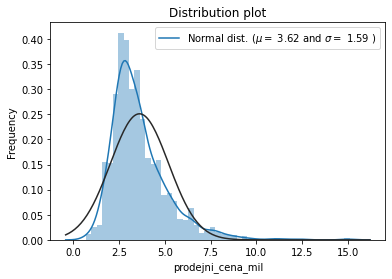

In [109]:
# Ukazka dat, na kterych je to vhodne
from scipy.stats import norm
seaborn.distplot(df['prodejni_cena_mil'], fit=norm).set_title('Distribution plot')
plt.ylabel('Frequency') # y label
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

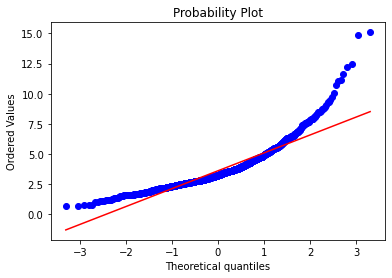

In [113]:
from scipy import stats
stats.probplot(df['prodejni_cena_mil'], plot=plt) # defining second graph
plt.show()

In [99]:
# log transformace
import numpy as np
mod = smf.ols(formula='np.log(prodejni_cena_mil) ~ obytna_plocha_m2 + plocha_pozemku_pred_domem_m2 + plocha_pozemku_m2 + celkova_kvalita + rok_vystavby + rok_rekonstrukce + plocha_garaze_m2 + pocet_koupelen', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(prodejni_cena_mil)   R-squared:                       0.815
Model:                                   OLS   Adj. R-squared:                  0.814
Method:                        Least Squares   F-statistic:                     801.1
Date:                       Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                               20:22:56   Log-Likelihood:                 501.99
No. Observations:                       1460   AIC:                            -986.0
Df Residuals:                           1451   BIC:                            -938.4
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -8.8814      0.577    -15.405      0.000     -10.012      -7.750
obytna_plocha_m2                 0.0027      0.000     18.489      0.000       0.002       0.003
plocha_pozemku_pred_domem_m2    -0.0017      0.001     -1.158      0.247      -0.005       0.001
plocha_pozemku_m2             4.467e-05   5.09e-06      8.783      0.000    3.47e-05    5.46e-05
celkova_kvalita                  0.1098      0.005     21.049      0.000       0.100       0.120
rok_vystavby                     0.0023      0.000     10.453      0.000       0.002       0.003
rok_rekonstrukce                 0.0022      0.000      7.540      0.000       0.002       0.003
plocha_garaze_m2                 0.0030      0.000     10.278      0.000       0.002       0.004
pocet_koupelen                  -0.0195      0.012     -1.635      0.102      -0.043       0.004
==============================================================================
Omnibus:                      846.221   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24504.700
Skew:                          -2.160   Prob(JB):                         0.00
Kurtosis:                      22.600   Cond. No.                     3.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""